In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
import os
print(os.listdir('data'))

['drugsComTest_raw.tsv', 'drugsComTrain_raw.tsv']


In [3]:
train_data = pd.read_csv('data/drugsComTrain_raw.tsv', sep='\t')
test_data = pd.read_csv('data/drugsComTest_raw.tsv', sep='\t')

# list data dimension
print(train_data.shape)
print(test_data.shape)

(161297, 7)
(53766, 7)


In [4]:
train_data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
# convert date format
train_data.date = pd.to_datetime(train_data.date)

Text(0.5, 1.0, 'Top20 drugs used condition')

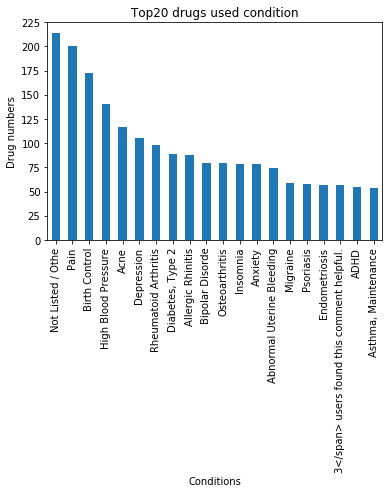

In [6]:
# number of drug per condition
df_drugPerCond = train_data.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
df_drugPerCond[0:20].plot(kind="bar")
plt.xlabel("Conditions")
plt.ylabel("Drug numbers")
plt.title("Top20 drugs used condition")

前20個使用藥品數量(drug numbers)最多的狀況(conditions)中，有一項  3 < /span>  users found this comment helpful ，並非一般所認定之情形，先行移除。

In [7]:
# remove 
for i, data in enumerate(train_data['condition']):
    if pd.isnull(data):
        train_data = train_data[train_data.condition != data]
    elif ('</span>' in data):
        train_data = train_data[train_data.condition != data]

train_data = train_data[train_data.condition != 'Not Listed / Othe']

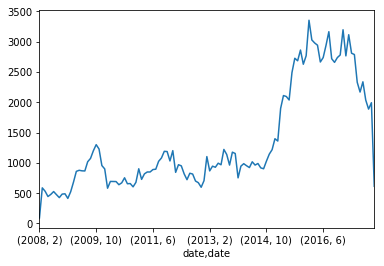

In [8]:
# reviews per month
df_ReviewPerMon = train_data.copy()

df_ReviewPerMon = df_ReviewPerMon.groupby([df_ReviewPerMon.date.dt.year, df_ReviewPerMon.date.dt.month])
df_ReviewPerMon.size().plot()

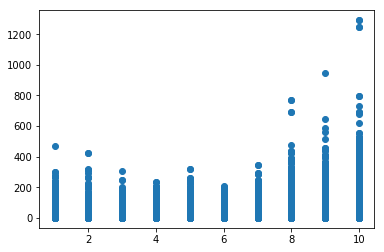

In [9]:
# distribute of rating and usefulCount
df_RateUseful = train_data[['rating', 'usefulCount']]
df_RateUseful = df_RateUseful.set_index('rating')
df_RateUseful.head()

plt.plot(df_RateUseful, 'o')
plt.show()

In [ ]:
# drug/condition pair average rating
t = []
df_drugPerCond = train_data.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
x = [i for i in range(0,len(df_drugPerCond.index))]
for index in df_drugPerCond.index:
    t.append(train_data[train_data.condition == index]['rating'].mean())
plt.bar(x, t, 3.5)


## data preprocess

In [ ]:
# 

In [ ]:
# encode drug name
drug_id = pd.factorize(train_data.drugName.tolist()+test_data.drugName.tolist())
train_data.drugName = drug_id[0][0:len(train_data.drugName)]
test_data.drugName  = drug_id[0][-len(test_data.drugName)-1:-1]

In [ ]:
# encode condition name
condition_id = pd.factorize(train_data.condition.tolist()+test_data.drugName.tolist())
train_data.condition = condition_id[0][0:len(train_data.condition)]
test_data.condition  = condition_id[0][-len(test_data.condition)-1:-1]

In [ ]:
# remove condition/drug pair less than 1
df_pair = train_data.groupby(['drugName', 'condition'])
df_pair = df_pair.filter(lambda x: len(x)>1)
train_data = df_pair
df_pair.head()

## Model

* 選擇feature

In [ ]:
df_trainX = train_data.drop(['Unnamed: 0', 'drugName', 'date', 'review'], axis=1)
df_trainY = train_data['drugName']

df_testX  = test_data.drop(['Unnamed: 0' , 'drugName', 'date', 'review'], axis=1)
df_testY  = test_data['drugName']


### decision tree

In [ ]:
# decision tree

from sklearn import tree, metrics

clf = tree.DecisionTreeClassifier()
clf = clf.fit(df_trainX, df_trainY)

pred = clf.predict(df_trainX)
decision_train_acc = metrics.accuracy_score(df_trainY, pred)
print('train acc:'+str(decision_train_acc))

pred = clf.predict(df_testX)
decision_test_acc = metrics.accuracy_score(df_testY, pred)
print('test acc:'+str(decision_test_acc))

### naive bayes

In [ ]:
# naive bayes
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf = clf.fit(df_trainX, df_trainY)

pred = clf.predict(df_trainX)
bayes_train_acc = metrics.accuracy_score(df_trainY, pred)
print('train acc:'+str(bayes_train_acc))

pred = clf.predict(df_testX)
bayes_test_acc = metrics.accuracy_score(df_testY, pred)
print('test acc:'+str(bayes_test_acc))

### AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
clf = clf.fit(df_trainX, df_trainY)

pred = clf.predict(df_trainX)
ada_train_acc = metrics.accuracy_score(df_trainY, pred)
print('train acc:'+str(ada_train_acc))

pred = clf.predict(df_testX)
ada_test_acc = metrics.accuracy_score(df_testY, pred)
print('test acc:'+str(ada_test_acc))

## 改進

* 對rating和usefulcount做normalize

In [ ]:
df_trainX = train_data.drop(['Unnamed: 0', 'drugName', 'date', 'review'], axis=1)
df_trainX.rating = df_trainX.rating/10
df_trainX.usefulCount = df_trainX.usefulCount/100
df_trainY = train_data['drugName']

df_testX  = test_data.drop(['Unnamed: 0' , 'drugName', 'date', 'review'], axis=1)
df_testX.rating = df_testX.rating/10
df_testX.usefulCount = df_testX.usefulCount/100
df_testY  = test_data['drugName']


### decision tree

In [ ]:
# decision tree

from sklearn import tree, metrics

clf = tree.DecisionTreeClassifier()
clf = clf.fit(df_trainX, df_trainY)

pred = clf.predict(df_trainX)
decision_train_acc1 = metrics.accuracy_score(df_trainY, pred)
print('train acc:'+str(decision_train_acc1))

pred = clf.predict(df_testX)
decision_test_acc1 = metrics.accuracy_score(df_testY, pred)
print('test acc:'+str(decision_test_acc1))

### naive bayes

In [ ]:
# naive bayes
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf = clf.fit(df_trainX, df_trainY)

pred = clf.predict(df_trainX)
bayes_train_acc1 = metrics.accuracy_score(df_trainY, pred)
print('train acc:'+str(bayes_train_acc1))

pred = clf.predict(df_testX)
bayes_test_acc1 = metrics.accuracy_score(df_testY, pred)
print('test acc:'+str(bayes_test_acc1))

### AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
clf = clf.fit(df_trainX, df_trainY)

pred = clf.predict(df_trainX)
ada_train_acc1 = metrics.accuracy_score(df_trainY, pred)
print('train acc:'+str(ada_train_acc1))

pred = clf.predict(df_testX)
ada_test_acc1 = metrics.accuracy_score(df_testY, pred)
print('test acc:'+str(ada_test_acc1))

* normalize後，三種分類的成長

In [ ]:
rate11 = decision_train_acc1 / decision_train_acc 
rate12 = decision_test_acc1 / decision_test_acc 
rate21 = bayes_train_acc1 / bayes_train_acc
rate22 = bayes_test_acc1 / bayes_test_acc
rate31 = ada_train_acc1 / ada_train_acc
rate32 = ada_test_acc1 / ada_test_acc

plt.bar([1,2,3,4,5,6], [rate11, rate12, rate21, rate22, rate31, rate32])
plt.show()

In [ ]:
print('decision tree train accuracy 提昇:' + str(rate11))
print('decision tree test accuracy 提昇:' + str(rate12))
print('bayes train accuracy 提昇:' + str(rate21))
print('bayes test accuracy 提昇:' + str(rate22))
print('ada boost train accuracy 提昇:' + str(rate31))
print('ada boost test accuracy 提昇:' + str(rate32))

## 改進

* 把超過100的usefulCount壓到100

In [ ]:
df_trainX = train_data.drop(['Unnamed: 0', 'drugName', 'date', 'review'], axis=1)
df_trainX.rating = df_trainX.rating/10
df_trainX.usefulCount = df_trainX.usefulCount/100
df_trainY = train_data['drugName']

df_testX  = test_data.drop(['Unnamed: 0' , 'drugName', 'date', 'review'], axis=1)
df_testX.rating = df_testX.rating/10
df_testX.usefulCount = df_testX.usefulCount/100
df_testY  = test_data['drugName']

df_trainX.usefulCount = df_trainX.usefulCount.apply(lambda x: 1 if x > 1 else x)
df_testX.usefulCount = df_testX.usefulCount.apply(lambda x: 1 if x > 1 else x)
df_trainX.head()

### decision tree

In [ ]:
# decision tree

from sklearn import tree, metrics

clf = tree.DecisionTreeClassifier()
clf = clf.fit(df_trainX, df_trainY)

pred = clf.predict(df_trainX)
decision_train_acc2 = metrics.accuracy_score(df_trainY, pred)
print('train acc:'+str(decision_train_acc2))

pred = clf.predict(df_testX)
decision_test_acc2 = metrics.accuracy_score(df_testY, pred)
print('test acc:'+str(decision_test_acc2))

### naive bayes

In [ ]:
# naive bayes
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf = clf.fit(df_trainX, df_trainY)

pred = clf.predict(df_trainX)
bayes_train_acc2 = metrics.accuracy_score(df_trainY, pred)
print('train acc:'+str(bayes_train_acc2))

pred = clf.predict(df_testX)
bayes_test_acc2 = metrics.accuracy_score(df_testY, pred)
print('test acc:'+str(bayes_test_acc2))

### ada boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
clf = clf.fit(df_trainX, df_trainY)

pred = clf.predict(df_trainX)
ada_train_acc2 = metrics.accuracy_score(df_trainY, pred)
print('train acc:'+str(ada_train_acc2))

pred = clf.predict(df_testX)
ada_test_acc2 = metrics.accuracy_score(df_testY, pred)
print('test acc:'+str(ada_test_acc2))

* compress + normalize 後三種分類的成長

In [ ]:
rate13 = decision_train_acc2 / decision_train_acc 
rate14 = decision_test_acc2 / decision_test_acc 
rate23 = bayes_train_acc2 / bayes_train_acc
rate24 = bayes_test_acc2 / bayes_test_acc
rate33 = ada_train_acc2 / ada_train_acc
rate34 = ada_test_acc2 / ada_test_acc

plt.bar([1,2,3,4,5,6], [rate13, rate14, rate23, rate24, rate33, rate34])
plt.show()

In [ ]:
print('decision tree train accuracy 提昇:' + str(rate13))
print('decision tree test accuracy 提昇:' + str(rate14))
print('bayes train accuracy 提昇:' + str(rate23))
print('bayes test accuracy 提昇:' + str(rate24))
print('ada boost train accuracy 提昇:' + str(rate33))
print('ada boost test accuracy 提昇:' + str(rate34))